In [1]:
!git clone https://github.com/dhrim/darkeras-yolov4

Cloning into 'darkeras-yolov4'...
remote: Enumerating objects: 172, done.
remote: Counting objects: 100% (33/33), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 172 (delta 25), reused 25 (delta 23), pack-reused 139
Receiving objects: 100% (172/172), 8.07 MiB | 10.20 MiB/s, done.
Resolving deltas: 100% (80/80), done.


In [2]:
%cd darkeras-yolov4

/content/darkeras-yolov4


# 모델 파일 다운로드

In [3]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [4]:
!cp /gdrive/MyDrive/tmp/yolov3_custom_last.weights ./

In [5]:
!ls -al *.weights

-rw------- 1 root root 246305388 Jul 11 07:58 yolov3_custom_last.weights


copy from https://github.com/tranleanh/darkeras-yolov4/blob/main/darkeras-yolov3.ipynb

# 데이터 다운로드

In [7]:
!unzip /gdrive/MyDrive/tmp/Raccoon.zip -d ./

Archive:  /gdrive/MyDrive/tmp/Raccoon.zip
  inflating: ./__MACOSX/._Raccoon    
  inflating: ./Raccoon/README.roboflow.txt  
  inflating: ./__MACOSX/Raccoon/._README.roboflow.txt  
   creating: ./Raccoon/valid/
  inflating: ./__MACOSX/Raccoon/._valid  
  inflating: ./Raccoon/README.dataset.txt  
  inflating: ./__MACOSX/Raccoon/._README.dataset.txt  
   creating: ./Raccoon/test/
  inflating: ./__MACOSX/Raccoon/._test  
   creating: ./Raccoon/train/
  inflating: ./__MACOSX/Raccoon/._train  
   creating: ./Raccoon/export/
  inflating: ./__MACOSX/Raccoon/._export  
  inflating: ./Raccoon/valid/raccoon-95_jpg.rf.f8c8616fc565907a66c86128839a766b.jpg  
  inflating: ./__MACOSX/Raccoon/valid/._raccoon-95_jpg.rf.f8c8616fc565907a66c86128839a766b.jpg  
  inflating: ./Raccoon/valid/raccoon-82_jpg.rf.00ff88031083cd95bc62294500428bb0.jpg  
  inflating: ./__MACOSX/Raccoon/valid/._raccoon-82_jpg.rf.00ff88031083cd95bc62294500428bb0.jpg  
  inflating: ./Raccoon/valid/raccoon-90_jpg.rf.50b2f1ed0bc307e1e94

# 모델 로딩

In [8]:
import yolov3_wrapper
model = yolov3_wrapper.YoloV3Wrapper("yolov3_custom_last.weights", class_num=1)

In [ ]:
# model.save("custom_model.h5")

# 이미지 로딩

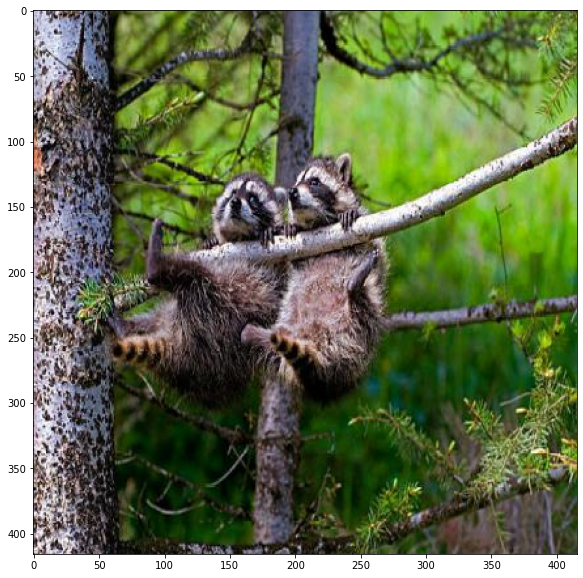

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

INPUT_SIZE = 608

image_path = "Raccoon/test/raccoon-63_jpg.rf.1b33356e79739a8a1f3676a9f4f9f97a.jpg"
image      = cv2.imread(image_path)
image      = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12,10))
plt.imshow(image)
plt.show()

# 탐지 실행

In [10]:
bboxes = model.predict(image)

In [11]:
print(len(bboxes))
for bbox in bboxes:
    print(bbox)

1
[ 49.07225037  94.70637512 275.4190979  407.15823364   0.81136525
   0.        ]


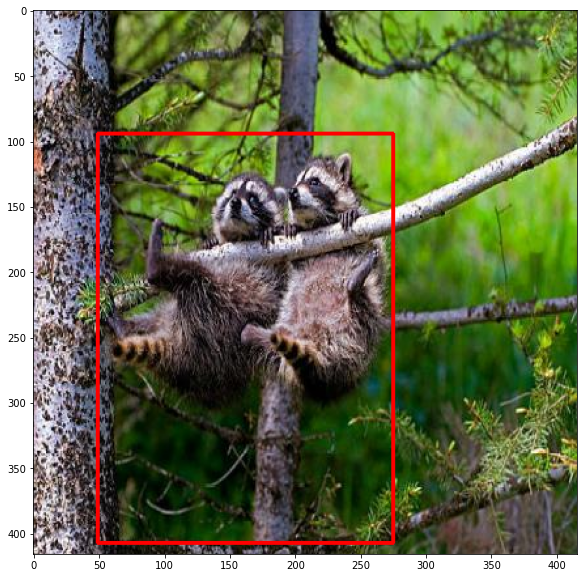

In [12]:
dummy = np.copy(image)

for box in bboxes:
    confidence = box[4]
    box = box.astype(np.int16)
    x1, y1, x2, y2 = box[0], box[1], box[2], box[3]
    class_id = box[5]
        
    dummy = cv2.rectangle(dummy, (x1,y1), (x2,y2), (255,0,0), 2)
     
plt.figure(figsize=(12,10))
plt.imshow(dummy)
plt.show()